In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from figure_grid import *

In [38]:
nullities = pd.read_csv('nullities.csv')
nullities.head(2)

,mod,n,m,nullity
0,2,1,1,0
1,2,1,2,1


In [39]:
#plot nullity for sizes 2-12 by 2-12 mod n
def plot_results_for_mod(n):
    R = np.zeros((16, 16))
    for _, r in nullities.query('mod == {}'.format(n)).iterrows():
        R[r.n-1][r.m-1] = r['nullity']
    plt.title(r'$nullity(A\%{})$'.format(n), fontsize=14)
    plt.xlabel(r'$m$')
    plt.ylabel(r'$n$')
    cmap = plt.get_cmap('jet', 10)
    img = plt.imshow(R[:11,:11], interpolation='none', vmin=0, vmax=10, extent=[2,12,12,2], cmap=cmap)
    plt.colorbar(img)

#plot whether the matrix has full rank (nullity 0)for sizes 2-12 by 2-12 mod n
def plot_full_rank_for_mod(n):
    R = np.zeros((16, 16))
    for _, r in nullities.query('mod == {}'.format(n)).iterrows():
        R[r.n-1][r.m-1] = r['nullity']
    plt.title(r'$full(A\%{})$'.format(n), fontsize=14)
    plt.xlabel(r'$m$')
    plt.ylabel(r'$n$')
    plt.imshow(R[:11,:11] == 0, interpolation='none', extent=[2,12,12,2])

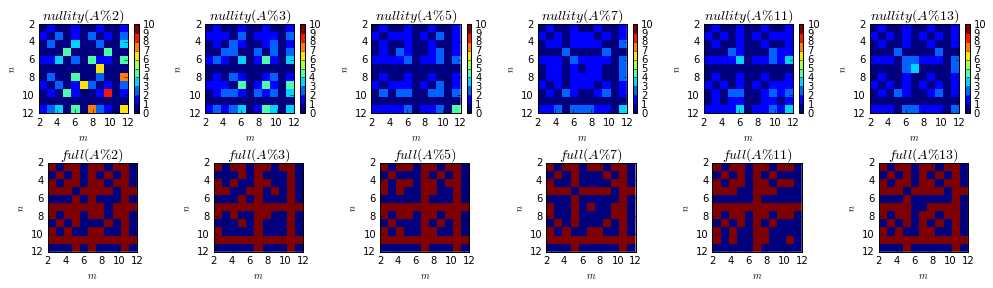

In [40]:
primes = (2, 3, 5, 7, 11, 13)
with figure_grid(2, 6, rowwidth=14, rowheight=2) as grid:
    for i in primes:
        grid.next_subplot()
        plot_results_for_mod(i)
    for i in primes:
        grid.next_subplot()
        plot_full_rank_for_mod(i)

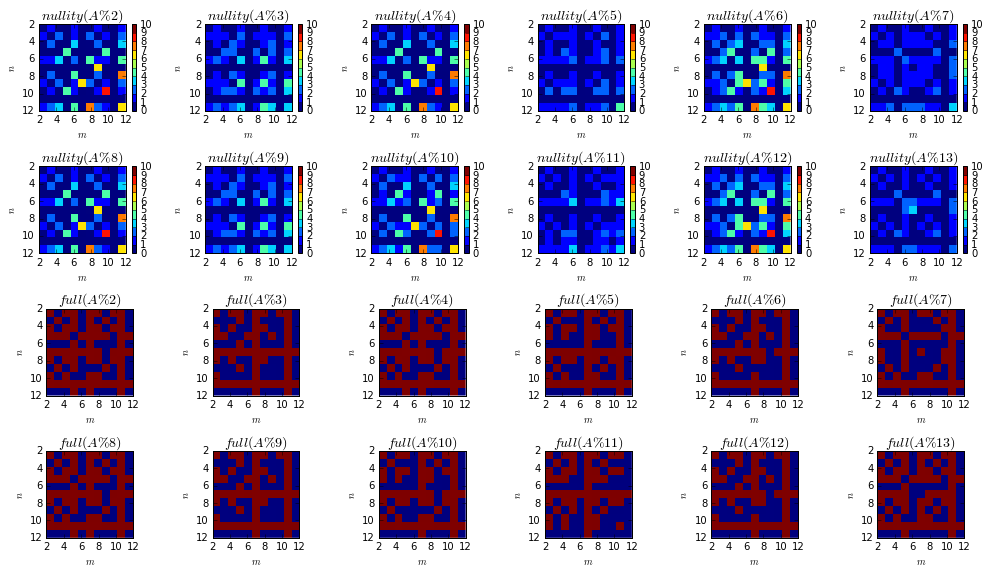

In [41]:
with figure_grid(4, 6, rowwidth=14, rowheight=2) as grid:
    for i in range(2, 14):
        grid.next_subplot()
        plot_results_for_mod(i)
    for i in range(2, 14):
        grid.next_subplot()
        plot_full_rank_for_mod(i)

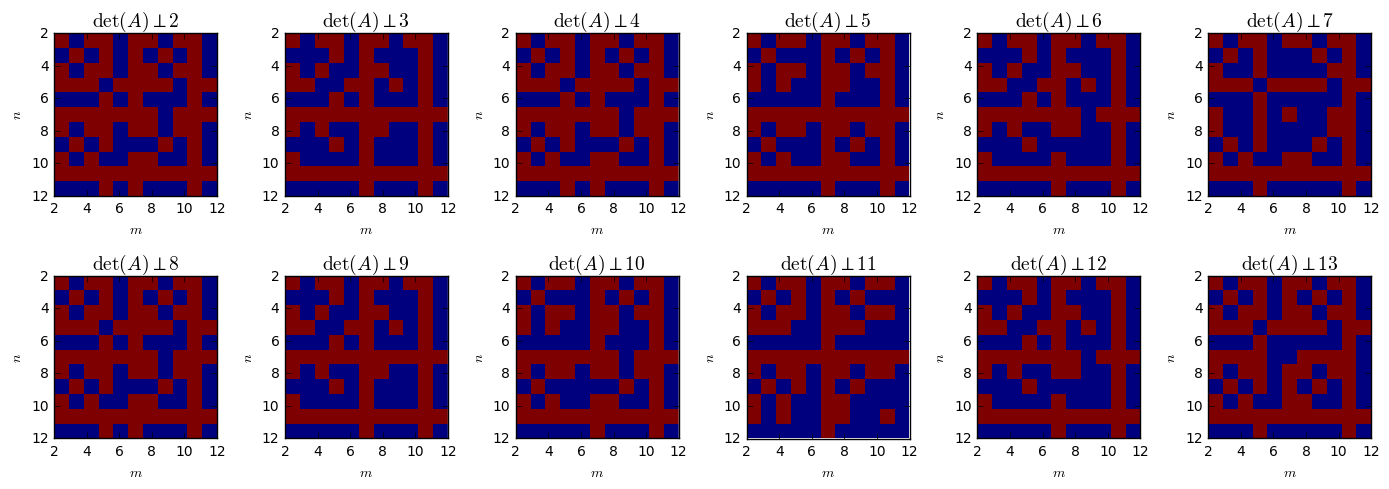

In [188]:
import math
from transition_helpers import *

adj = lambda i, j: [[i,j,1],[i+1,j,1],[i-1,j,1],[i,j+1,1],[i,j-1,1]]

with figure_grid(2, 6, rowwidth=14, rowheight=2.5) as grid:
    for k in range(2, 14):
        R = np.zeros((11, 11), dtype=np.int64)
        for m in range(1, 12):
            for n in range(1, 12):
                A = transition_matrix(adj, n, m, k)
                R[m-1][n-1] = int(math.gcd(k, int(round(np.linalg.det(A.array)))) == 1)
        grid.next_subplot()
        plt.title(r'$\det(A) \perp {}$'.format(k), fontsize=14)
        plt.xlabel(r'$m$')
        plt.ylabel(r'$n$')
        plt.imshow(R, interpolation='none', extent=[2,12,12,2])

[[ 0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.]
 [ 1.  1.  2.  0.  2.  0.  2.  1.  1.  0.  2.  0.  1.  1.  2.  0.]
 [ 0.  2.  0.  2.  3.  1.  2.  2.  2.  0.  3.  1.  1.  3.  3.  0.]
 [ 0.  0.  2.  4.  2.  2.  2.  0.  4.  3.  2.  0.  1.  4.  2.  1.]
 [ 1.  2.  3.  1.  3.  0.  4.  4.  1.  0.  4.  1.  2.  2.  4.  0.]
 [ 0.  0.  1.  0.  0.  0.  2.  6.  0.  1.  4.  3.  3.  0.  3.  0.]
 [ 0.  3.  0.  2.  4.  2.  0.  2.  2.  0.  7.  2.  2.  3.  3.  3.]
 [ 1.  1.  4.  0.  5.  6.  2.  6.  2.  3.  4.  0.  7.  1.  3.  2.]
 [ 0.  2.  3.  4.  1.  2.  3.  2.  8.  1.  3.  3.  3.  5.  2.  1.]
 [ 0.  1.  2.  2.  0.  0.  1.  3.  2.  0.  2.  1.  2.  0.  2.  3.]
 [ 1.  2.  3.  4.  4.  0.  7.  4.  3.  1.  6.  2.  1.  9.  8.  3.]
 [ 0.  1.  1.  2.  1.  4.  0.  3.  0.  2.  3.  6.  6.  2.  2.  2.]
 [ 0.  2.  1.  1.  1.  4.  1.  7.  1.  0.  3.  6.  6.  1.  2.  1.]
 [ 1.  1.  4.  4.  3.  0.  5.  3.  5.  3.  9.  4.  3.  7.  3.  8.]
 [ 0.  3.  1.  4.  4.  1.  1.  2.  4.  2.  8.  1.  3.  3.  3. 

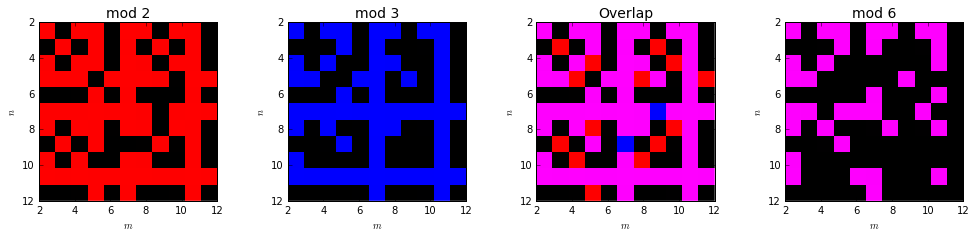

In [26]:
#plot full rank analysis for mod 2, 3, and 6
from matplotlib.colors import LinearSegmentedColormap

def load_nullities(n):
    R = np.zeros((16, 16))
    for _, r in nullities.query('mod == {}'.format(n)).iterrows():
        R[r.n-1][r.m-1] = r['nullity']
    return R
    
R2 = (load_nullities(2) > 0).astype(np.int)
R3 = (load_nullities(3) > 0).astype(np.int)
R6overlap = R2 * 2 + R3
R6 = (R6overlap > 0).astype(np.int)
R6 = (load_nullities(6) > 0).astype(np.int)

print load_nullities(6)

with figure_grid(2, 4, rowwidth=14, rowheight=3) as grid:
    grid.next_subplot()
    cm = LinearSegmentedColormap.from_list("red", [(1, 0, 0), (0, 0, 0)], N=2)    
    plt.imshow(R2[:11,:11], interpolation='none', extent=[2,12,12,2], cmap=cm)
    plt.title("mod 2", fontsize=14)
    plt.xlabel(r'$m$')
    plt.ylabel(r'$n$')
    
    grid.next_subplot()
    cm = LinearSegmentedColormap.from_list("blue", [(0, 0, 1), (0, 0, 0)], N=2) 
    plt.imshow(R3[:11,:11], interpolation='none', extent=[2,12,12,2], cmap=cm)
    plt.title("mod 3", fontsize=14)
    plt.xlabel(r'$m$')
    plt.ylabel(r'$n$')
    
    grid.next_subplot()
    cm = LinearSegmentedColormap.from_list("all", [(1, 0, 1), (1, 0, 0), (0, 0, 1), (0, 0, 0)], N=4) 
    plt.imshow(R6overlap[:11,:11], interpolation='none', extent=[2,12,12,2], cmap=cm) 
    plt.title("Overlap", fontsize=14)
    plt.xlabel(r'$m$')
    plt.ylabel(r'$n$')
    
    grid.next_subplot()
    cm = LinearSegmentedColormap.from_list("purple", [(1, 0, 1), (0, 0, 0)], N=2) 
    plt.imshow(R6[:11,:11], interpolation='none', extent=[2,12,12,2], cmap=cm)
    plt.title("mod 6", fontsize=14)
    plt.xlabel(r'$m$')
    plt.ylabel(r'$n$')